In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('2008_1.csv')

In [3]:
df.shape

(7009728, 29)

In [5]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
df.fillna(0.0,inplace=True)

In [7]:
df['TotDelay'] = df['ActualElapsedTime'] - df['CRSElapsedTime']

In [10]:
print(df.Month.nunique(),len(df.UniqueCarrier.unique()), len(df.FlightNum.unique()), len(df.TailNum.unique()), len(df.Origin.unique()),len(df.Dest.unique()))

12 20 7539 5374 303 304


In [13]:
df.UniqueCarrier.unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

In [203]:

df_al_stat = pd.DataFrame(df.groupby('UniqueCarrier')['TotDelay'].describe().reset_index())

In [ ]:
df_al_stat.sort_values('75%')

In [168]:
df_O_TotDelay = pd.DataFrame(df.groupby('Origin')['TotDelay'].describe().reset_index())

len(df_O_TotDelay)

303

In [169]:
df_O_TotDelay.sort_values('75%',ascending=False).head(10)

,Origin,count,mean,std,min,25%,50%,75%,max
232,PUB,2.0,47.000000,31.112698,25.0,36.0,47.0,58.0,69.0
144,ITH,132.0,-0.075758,31.906261,-93.0,-1.0,4.0,13.0,73.0
212,OTH,515.0,1.456311,23.122738,-120.0,-5.0,4.0,12.5,73.0
301,YKM,340.0,3.467647,15.034341,-90.0,-3.0,4.0,11.0,62.0
110,GCC,1046.0,3.235182,19.090370,-116.0,-5.0,3.0,11.0,105.0
242,RKS,954.0,2.166667,18.899927,-93.0,-2.0,4.0,10.0,188.0
150,JFK,118804.0,-6.839585,44.830321,-605.0,-17.0,-5.0,9.0,368.0
277,STX,436.0,-1.490826,27.822630,-253.0,-5.0,0.0,8.0,91.0
239,RFD,290.0,-1.062069,25.586469,-165.0,-7.0,0.0,8.0,68.0
45,BTV,7005.0,-1.734475,24.645442,-205.0,-10.0,-2.0,8.0,192.0


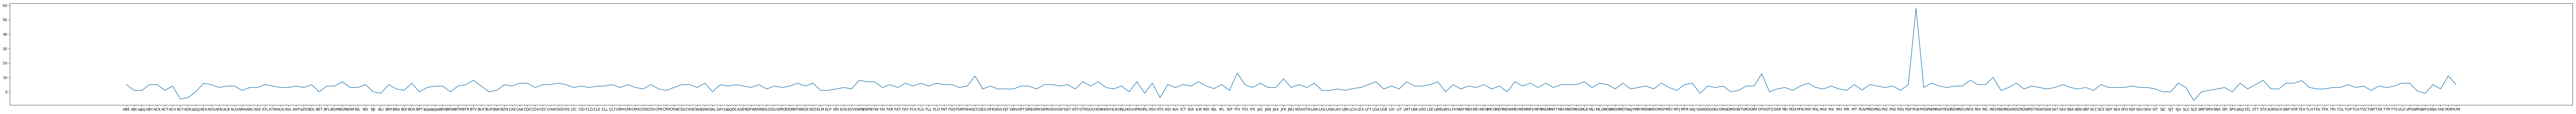

In [177]:
plt.figure(figsize=(125,5))
plt.plot(df_O_TotDelay['Origin'],df_O_TotDelay['75%'])

plt.show()

In [122]:
df_D_TotDelay = pd.DataFrame(df.groupby('Dest')['TotDelay'].describe().reset_index())
len(df_D_TotDelay)

304

In [123]:
df_D_TotDelay.sort_values('75%',ascending=False).head(10)

,Dest,count,mean,std,min,25%,50%,75%,max
269,SLE,484.0,8.371901,16.193643,-23.0,-4.00,9.0,17.00,110.0
302,YKM,338.0,3.973373,13.506209,-100.0,-3.00,3.0,12.00,45.0
214,OTH,517.0,2.404255,19.323165,-114.0,-2.00,4.0,11.00,49.0
4,ACK,469.0,-5.119403,37.665172,-300.0,-17.00,-3.0,10.00,165.0
8,ADK,102.0,-18.892157,60.931857,-198.0,-12.75,-1.5,9.75,32.0
163,LGA,119117.0,-6.006498,35.684614,-450.0,-13.00,-4.0,8.00,350.0
111,GCC,1046.0,-0.066922,16.266363,-105.0,-7.00,1.0,8.00,109.0
151,JFK,118802.0,-5.664366,37.607896,-536.0,-13.00,-4.0,7.00,350.0
267,SJU,21691.0,-3.160481,25.901189,-291.0,-11.00,-3.0,6.00,187.0
18,ATL,414521.0,-1.992283,22.349751,-533.0,-9.00,-2.0,6.00,274.0


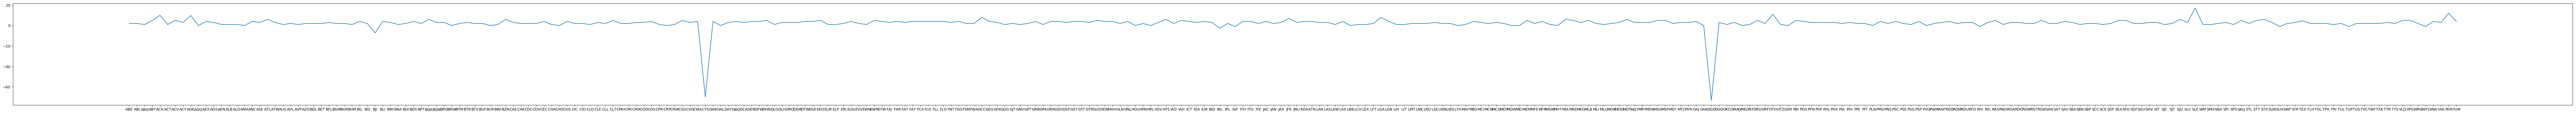

In [178]:
plt.figure(figsize=(125,5))
plt.plot(df_D_TotDelay['Dest'],df_D_TotDelay['75%'])

plt.show()


In [22]:
airline_series = np.array([
    ['1D','Radixx'],['9E','Pinnacle Airlines'],['AA','American Airlines'],['AQ','Aloha Airlines'],['AS','Alaska Airlines, Inc.'],['B6','JetBlue Airways'],['BB','Seaborne Airlines'],['CO','Continental Airlines'],['DL','Delta Air Lines'],['EV','ExpressJet'],['F9','Frontier Airlines'],['FL','AirTran Airways'],['HA','Hawaiian Airlines'],['MQ','American Eagle Airlines'],['NW','Northwest Airlines'],['OH','Comair'],['OO','SkyWest Airlines'],['UA','United Airlines'],['US','US Airways'],['WN','Southwest Airlines'],['XE','ExpressJet'],['YV','Mesa Airlines']
])
df_al = pd.DataFrame(airline_series, columns=['UniqueCarrier','Airline'])

In [23]:
df_al.head(10)

,UniqueCarrier,Airline
0,1D,Radixx
1,9E,Pinnacle Airlines
2,AA,American Airlines
3,AQ,Aloha Airlines
4,AS,"Alaska Airlines, Inc."
5,B6,JetBlue Airways
6,BB,Seaborne Airlines
7,CO,Continental Airlines
8,DL,Delta Air Lines
9,EV,ExpressJet


In [88]:
df_Carrier_stat = pd.DataFrame((pd.merge(df_al, df_al_stat, on='UniqueCarrier')).sort_values('75%',ascending=False))

In [92]:
df_Carrier_stat

,UniqueCarrier,Airline,count,mean,std,min,25%,50%,75%,max
12,NW,Northwest Airlines,347652.0,-0.308786,19.657385,-511.0,-8.0,-1.0,7.0,254.0
6,DL,Delta Air Lines,451931.0,-2.543762,25.659679,-604.0,-9.0,-2.0,6.0,368.0
13,OH,Comair,197607.0,-3.740434,27.862905,-320.0,-10.0,-2.0,6.0,355.0
19,YV,Mesa Airlines,254930.0,-3.600435,21.909240,-227.0,-8.0,-2.0,5.0,215.0
4,B6,JetBlue Airways,196091.0,-5.315364,35.255086,-605.0,-12.0,-4.0,5.0,350.0
8,F9,Frontier Airlines,95762.0,-0.390384,15.088022,-412.0,-7.0,-1.0,5.0,222.0
9,FL,AirTran Airways,261684.0,-1.563183,19.330165,-323.0,-8.0,-2.0,5.0,251.0
1,AA,American Airlines,604885.0,-5.663412,33.749575,-560.0,-10.0,-3.0,5.0,312.0
18,XE,ExpressJet,374510.0,-4.131609,25.749096,-247.0,-9.0,-3.0,4.0,412.0
3,AS,"Alaska Airlines, Inc.",151102.0,-4.137013,22.883980,-414.0,-10.0,-3.0,4.0,192.0


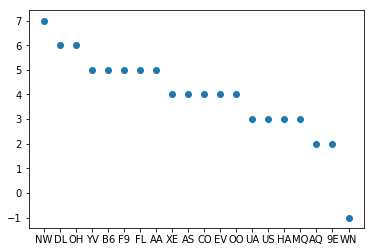

In [118]:
plt.scatter(x=df_Carrier_stat['UniqueCarrier'], y=df_Carrier_stat['75%'])
plt.show()

In [28]:
df_big_delay = pd.DataFrame(df[df['TotDelay'] >60])


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotDelay
273,2008,1,3,4,2021.0,1700,2303.0,1835,WN,2005,...,85.0,0,0,0,192.0,0.0,67.0,0.0,9.0,67.0
3576,2008,1,4,5,2225.0,2150,40.0,2255,WN,135,...,31.0,0,0,0,0.0,0.0,105.0,0.0,0.0,70.0
5344,2008,1,4,5,707.0,705,1454.0,1315,WN,477,...,119.0,0,0,0,0.0,0.0,99.0,0.0,0.0,97.0
8086,2008,1,5,6,1348.0,1330,1619.0,1455,WN,78,...,67.0,0,0,0,0.0,3.0,66.0,0.0,15.0,66.0
8318,2008,1,5,6,947.0,855,1223.0,1025,WN,3234,...,66.0,0,0,0,0.0,52.0,66.0,0.0,0.0,66.0
8324,2008,1,5,6,1012.0,1010,1247.0,1140,WN,720,...,95.0,0,0,0,0.0,0.0,67.0,0.0,0.0,65.0
8333,2008,1,5,6,943.0,750,1111.0,810,WN,790,...,63.0,0,0,0,0.0,113.0,68.0,0.0,0.0,68.0
8337,2008,1,5,6,1025.0,1010,1227.0,1110,WN,2549,...,64.0,0,0,0,0.0,15.0,62.0,0.0,0.0,62.0
9750,2008,1,6,7,2031.0,2005,2242.0,2115,WN,2367,...,40.0,0,0,0,0.0,0.0,72.0,0.0,15.0,61.0
11519,2008,1,6,7,1038.0,1010,1322.0,1110,WN,2549,...,113.0,0,0,0,0.0,0.0,131.0,0.0,1.0,104.0


In [44]:
print (len(df_big_delay), len(df_big_delay[df_big_delay['NASDelay'] >0]))

35110 34303


In [282]:
cancelled_flight = df['Cancelled'] == 1

In [312]:
df_cancelled = pd.DataFrame(df[cancelled_flight].groupby('UniqueCarrier').count().reset_index())


In [313]:
df_cancelled

,UniqueCarrier,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotDelay
0,9E,7100,7100,7100,7100,7100,7100,7100,7100,7100,...,7100,7100,7100,7100,7100,7100,7100,7100,7100,7100
1,AA,17440,17440,17440,17440,17440,17440,17440,17440,17440,...,17440,17440,17440,17440,17440,17440,17440,17440,17440,17440
2,AQ,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
3,AS,2139,2139,2139,2139,2139,2139,2139,2139,2139,...,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139
4,B6,3205,3205,3205,3205,3205,3205,3205,3205,3205,...,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205
5,CO,3702,3702,3702,3702,3702,3702,3702,3702,3702,...,3702,3702,3702,3702,3702,3702,3702,3702,3702,3702
6,DL,6813,6813,6813,6813,6813,6813,6813,6813,6813,...,6813,6813,6813,6813,6813,6813,6813,6813,6813,6813
7,EV,5026,5026,5026,5026,5026,5026,5026,5026,5026,...,5026,5026,5026,5026,5026,5026,5026,5026,5026,5026
8,F9,303,303,303,303,303,303,303,303,303,...,303,303,303,303,303,303,303,303,303,303
9,FL,2236,2236,2236,2236,2236,2236,2236,2236,2236,...,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236


In [314]:
df_cancelled_trunc = df_cancelled[['UniqueCarrier','Year']]

In [315]:
df_cancelled_trunc

,UniqueCarrier,Year
0,9E,7100
1,AA,17440
2,AQ,42
3,AS,2139
4,B6,3205
5,CO,3702
6,DL,6813
7,EV,5026
8,F9,303
9,FL,2236


In [317]:
df_al_stat_trunc = df_al_stat[['UniqueCarrier','count']]

In [320]:
pd_cancelled_stat = pd.DataFrame(pd.merge(df_cancelled_trunc, df_al_stat_trunc))

In [322]:
pd_cancelled_stat['Perc'] = (1- pd_cancelled_stat['Year']/pd_cancelled_stat['count'])*100


In [329]:
pd_cancelled_stat.sort_values(['count'],ascending=[False])

,UniqueCarrier,Year,count,Perc
17,WN,12389,1201754.0,98.969090
1,AA,17440,604885.0,97.116807
14,OO,12436,567159.0,97.807317
11,MQ,18331,490693.0,96.264263
16,US,6582,453589.0,98.548907
6,DL,6813,451931.0,98.492469
15,UA,10541,449515.0,97.655028
18,XE,9992,374510.0,97.331980
12,NW,2906,347652.0,99.164107
5,CO,3702,298455.0,98.759612


In [ ]:
pd.merge(pd_cancelled_stat,df_carrier_stat,on='UniqueCarrier').sort_values(['Perc'],ascending=[False])